In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/american-companies-bankruptcy-prediction-dataset/american_bankruptcy.csv


In [2]:
import ipywidgets as widgets
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.tree import DecisionTreeClassifier
from ipywidgets import interact
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.impute import SimpleImputer
from sklearn.metrics import (
    ConfusionMatrixDisplay,
    classification_report,
    confusion_matrix,
)
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.pipeline import make_pipeline


In [3]:
df=pd.read_csv('/kaggle/input/american-companies-bankruptcy-prediction-dataset/american_bankruptcy.csv')

In [4]:
df=df.set_index('year')

In [5]:
df.columns

Index(['company_name', 'status_label', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6',
       'X7', 'X8', 'X9', 'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16',
       'X17', 'X18'],
      dtype='object')

In [6]:
df.drop(columns='company_name', inplace=True)

In [7]:
df

,status_label,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18
year,,,,,,,,,,,,,,,,,,,
1999,alive,511.267,833.107,18.373,89.031,336.018,35.163,128.348,372.7519,1024.333,740.998,180.447,70.658,191.226,163.816,201.026,1024.333,401.483,935.302
2000,alive,485.856,713.811,18.577,64.367,320.590,18.531,115.187,377.1180,874.255,701.854,179.987,45.790,160.444,125.392,204.065,874.255,361.642,809.888
2001,alive,436.656,526.477,22.496,27.207,286.588,-58.939,77.528,364.5928,638.721,710.199,217.699,4.711,112.244,150.464,139.603,638.721,399.964,611.514
2002,alive,396.412,496.747,27.172,30.745,259.954,-12.410,66.322,143.3295,606.337,686.621,164.658,3.573,109.590,203.575,124.106,606.337,391.633,575.592
2003,alive,432.204,523.302,26.680,47.491,247.245,3.504,104.661,308.9071,651.958,709.292,248.666,20.811,128.656,131.261,131.884,651.958,407.608,604.467
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014,alive,233.211,43.338,14.094,45.615,3.376,25.261,22.846,756.4827,104.223,1099.101,184.666,31.521,60.885,28.197,28.095,104.223,225.887,58.608
2015,alive,105.559,59.184,42.592,202.133,2.288,129.688,54.611,527.5750,291.153,1865.926,770.103,159.541,231.969,88.128,157.783,291.153,880.327,89.020
2016,alive,63.971,69.074,65.057,79.051,2.581,-1.442,42.467,578.8868,169.858,1746.235,683.985,13.994,100.784,85.765,156.341,169.858,770.233,90.807


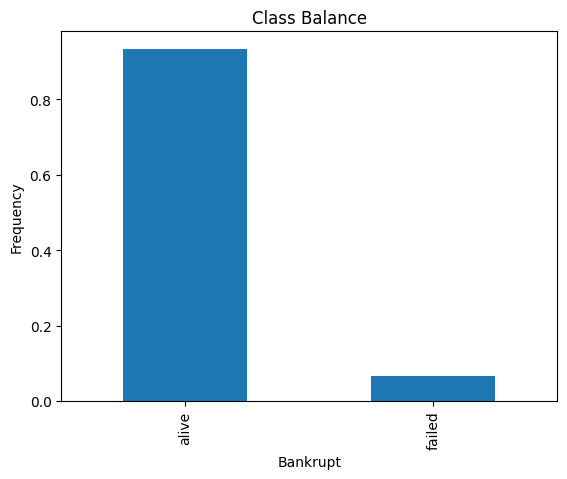

In [8]:
df['status_label'].value_counts(normalize=True).plot(
    kind='bar',
    xlabel='Bankrupt',
    ylabel='Frequency',
    title='Class Balance');


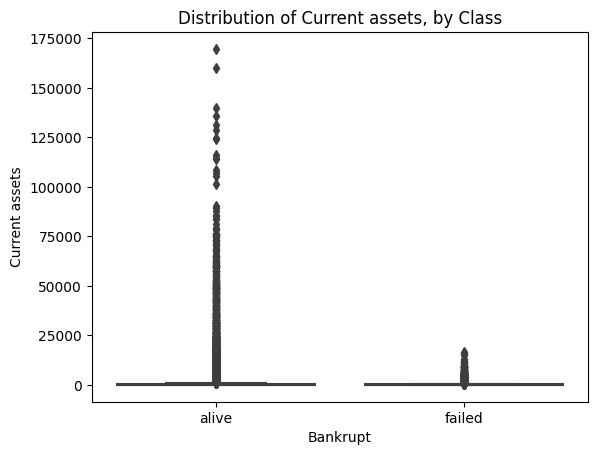

In [9]:
sns.boxplot(x='status_label', y='X1', data=df)
plt.xlabel("Bankrupt")
plt.ylabel("Current assets")
plt.title("Distribution of Current assets, by Class");

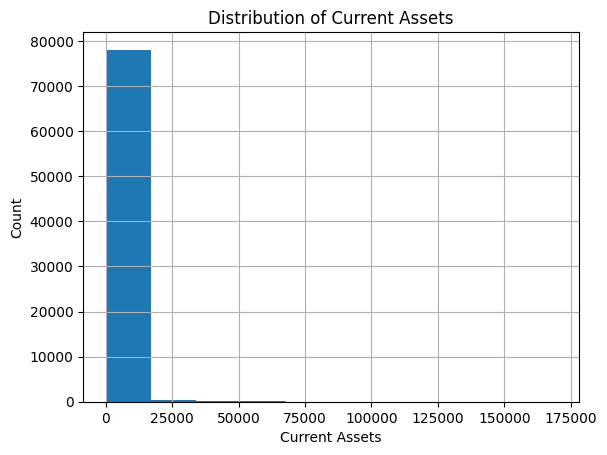

In [10]:
df['X1'].hist()
plt.xlabel("Current Assets")
plt.ylabel("Count"),
plt.title("Distribution of Current Assets");

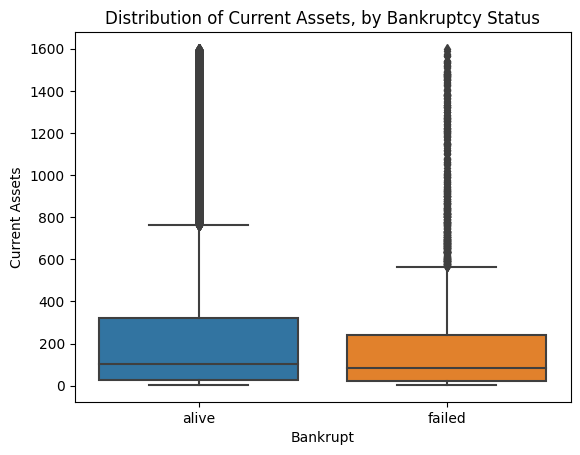

In [11]:
q1,q9=df['X1'].quantile([0.1,0.9])
mask = df['X1'].between(q1,q9)
sns.boxplot(x='status_label', y='X1', data=df[mask])
plt.xlabel("Bankrupt")
plt.ylabel("Current Assets")
plt.title("Distribution of Current Assets, by Bankruptcy Status");

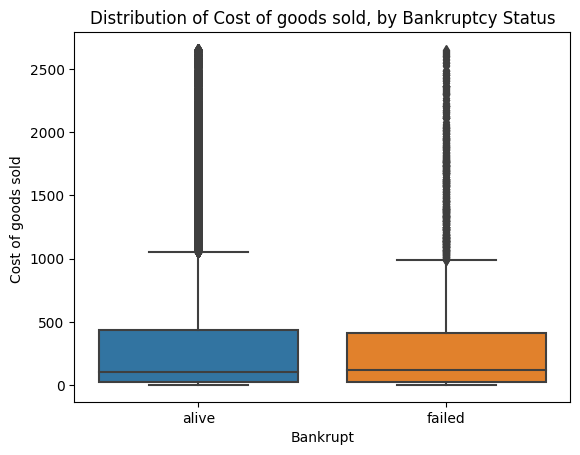

In [12]:
q1,q9=df['X2'].quantile([0.1,0.9])
mask = df['X2'].between(q1,q9)
sns.boxplot(x='status_label', y='X2', data=df[mask])
plt.xlabel("Bankrupt")
plt.ylabel("Cost of goods sold ")
plt.title("Distribution of Cost of goods sold, by Bankruptcy Status");

In [13]:
target = "status_label"
X = df.drop(columns='status_label')
y = df[target]

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
under_sampler = RandomUnderSampler(random_state=42)
X_train_under, y_train_under = under_sampler.fit_resample(X_train, y_train)
print(X_train_under.shape)
X_train_under.head()

(8304, 18)


,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18
year,,,,,,,,,,,,,,,,,,
2001,144.645,186.166,28.366,67.730,25.120,31.936,40.725,312.6657,323.352,278.953,56.996,39.364,137.186,54.342,39.205,323.352,116.048,255.622
2004,258.078,945.211,68.086,156.076,5.421,86.945,205.383,744.1578,1101.287,1787.608,493.761,87.990,156.076,197.624,244.383,1101.287,1239.211,945.211
2008,48.023,39.309,1.406,6.032,12.826,2.964,9.246,49.1117,71.783,62.155,0.000,4.626,32.474,7.904,25.351,71.783,10.684,65.751
2008,2554.100,11752.400,90.800,565.700,1876.000,-1243.100,387.400,1747.3076,14131.900,6014.100,1225.600,474.900,2379.500,2455.800,2022.300,14131.900,3816.000,13566.200
2012,154.014,276.204,25.245,59.513,64.437,9.127,67.497,387.0834,410.505,605.318,201.530,34.268,134.301,59.361,27.273,410.505,290.588,350.992


In [16]:
over_sampler = RandomOverSampler(random_state=42)
X_train_over, y_train_over =over_sampler.fit_resample(X_train, y_train)
print(X_train_over.shape)
X_train_over.head()

(117586, 18)


,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18
0,46.586,72.848,3.402,-4.644,12.405,-11.818,25.495,39.2014,93.100,57.937,0.000,-8.046,20.252,19.125,-130.221,93.100,19.125,97.744
1,19.389,17.911,3.404,3.777,6.405,1.060,5.417,59.2595,32.525,47.117,5.670,0.373,14.614,5.712,-194.776,32.525,11.760,28.748
2,1.293,0.363,0.403,-13.116,0.000,-33.904,0.262,14.1718,0.787,2.578,0.000,-13.519,0.424,34.626,-89.817,0.787,38.507,13.903
3,215.937,262.363,50.751,8.733,53.568,-58.922,55.478,81.0974,347.189,479.712,175.191,-42.018,84.826,38.572,-157.645,347.189,215.034,338.456
4,159.985,77.071,15.484,-19.247,61.897,-41.660,46.430,847.1710,236.634,383.525,71.827,-34.731,159.563,44.081,-212.852,236.634,121.957,255.881


In [17]:
acc_baseline = y_train.value_counts(normalize=True).max()
print("Baseline Accuracy:", round(acc_baseline, 4))

Baseline Accuracy: 0.934


In [18]:
model_reg = make_pipeline(
    SimpleImputer(strategy='median'),
    DecisionTreeClassifier(random_state=42)
)
model_reg.fit(X_train, y_train)

# Fit on `X_train_under`, `y_train_under`
model_under = make_pipeline(
    SimpleImputer(strategy='median'),
    DecisionTreeClassifier(random_state=42)
)
model_under.fit(X_train_under, y_train_under)

# Fit on `X_train_over`, `y_train_over`
model_over = make_pipeline(
    SimpleImputer(strategy='median'),
    DecisionTreeClassifier(random_state=42)
)
model_over.fit(X_train_over, y_train_over)

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(random_state=42))])

In [19]:
for m in [model_reg, model_under, model_over]:
    acc_train = m.score(X_train,y_train)
    acc_test = m.score(X_test,y_test)

    print("Training Accuracy:", round(acc_train, 4))
    print("Test Accuracy:", round(acc_test, 4))

Training Accuracy: 1.0
Test Accuracy: 0.8936
Training Accuracy: 0.6927
Test Accuracy: 0.6466
Training Accuracy: 1.0
Test Accuracy: 0.8983


In [20]:
y_test.value_counts()

status_label
alive     14669
failed     1068
Name: count, dtype: int64

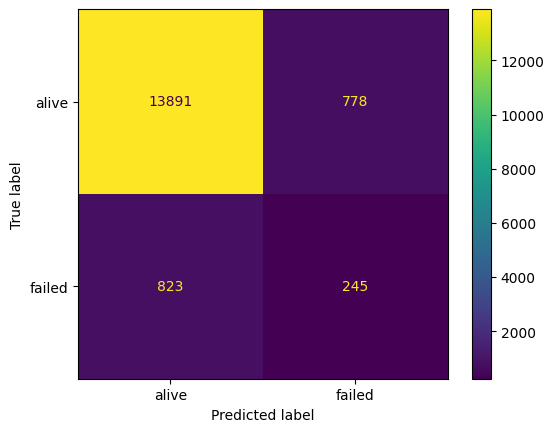

In [21]:
ConfusionMatrixDisplay.from_estimator(model_over, X_test, y_test);

In [22]:
depth = model_over.named_steps['decisiontreeclassifier'].get_depth()
print(depth)

44


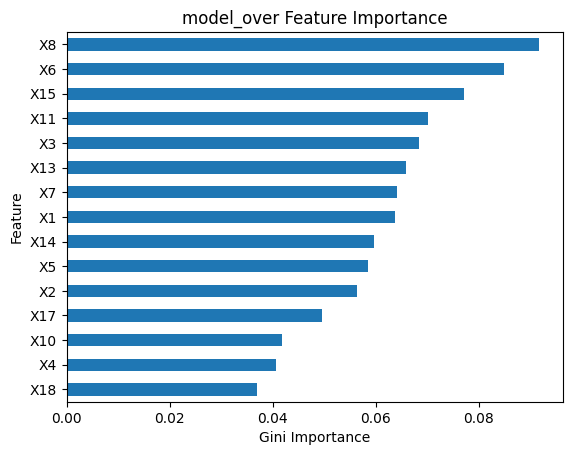

In [23]:
importances = model_over.named_steps['decisiontreeclassifier'].feature_importances_

# Put importances into a Series
feat_imp = pd.Series(importances, index= X_train_over.columns).sort_values()

# Plot series
feat_imp.tail(15).plot(kind='barh')
plt.xlabel("Gini Importance")
plt.ylabel("Feature")
plt.title("model_over Feature Importance");

In [24]:
from sklearn.ensemble import RandomForestClassifier

In [25]:
clf = make_pipeline(SimpleImputer(), RandomForestClassifier(random_state=42))
print(clf)

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('randomforestclassifier',
                 RandomForestClassifier(random_state=42))])


In [26]:
params = {
    'simpleimputer__strategy': ['mean', 'median'],
    'randomforestclassifier__n_estimators': range(25,100,25) ,
    'randomforestclassifier__max_depth': range(10,50,10)
}
params

{'simpleimputer__strategy': ['mean', 'median'],
 'randomforestclassifier__n_estimators': range(25, 100, 25),
 'randomforestclassifier__max_depth': range(10, 50, 10)}

In [27]:
model = GridSearchCV(
    clf,
    param_grid=params,
    cv=5,
    n_jobs=-1,
    verbose=1
)
model

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('simpleimputer', SimpleImputer()),
                                       ('randomforestclassifier',
                                        RandomForestClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'randomforestclassifier__max_depth': range(10, 50, 10),
                         'randomforestclassifier__n_estimators': range(25, 100, 25),
                         'simpleimputer__strategy': ['mean', 'median']},
             verbose=1)

In [28]:
model.fit(X_train_over, y_train_over)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('simpleimputer', SimpleImputer()),
                                       ('randomforestclassifier',
                                        RandomForestClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'randomforestclassifier__max_depth': range(10, 50, 10),
                         'randomforestclassifier__n_estimators': range(25, 100, 25),
                         'simpleimputer__strategy': ['mean', 'median']},
             verbose=1)

In [29]:
model.best_params_

{'randomforestclassifier__max_depth': 40,
 'randomforestclassifier__n_estimators': 75,
 'simpleimputer__strategy': 'mean'}

In [30]:
acc_train = model.score(X_train_over, y_train_over)
acc_test = model.score(X_test, y_test)

print("Training Accuracy:", round(acc_train, 4))
print("Test Accuracy:", round(acc_test, 4))

Training Accuracy: 1.0
Test Accuracy: 0.9388


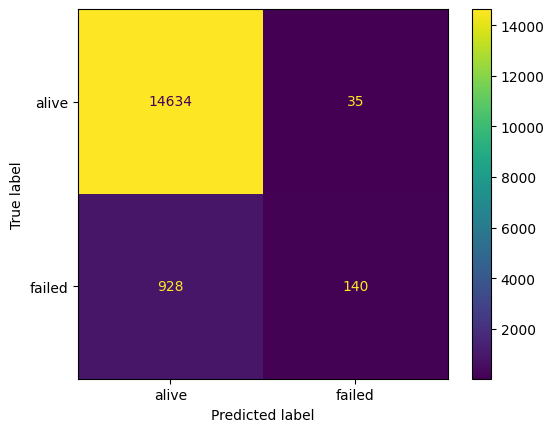

In [31]:
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test);

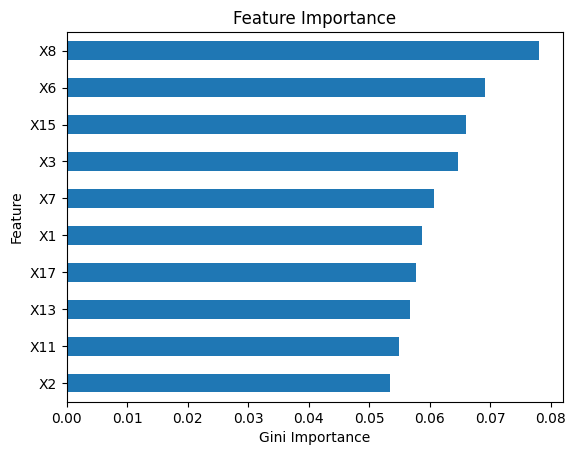

In [32]:
features = X_train_over.columns

# Extract importances from model
importances = model.best_estimator_.named_steps['randomforestclassifier'].feature_importances_

# Create a series with feature names and importances
feat_imp = pd.Series(importances, index=features).sort_values()

# Plot 10 most important features
feat_imp.tail(10).plot(kind='barh')
plt.xlabel("Gini Importance")
plt.ylabel("Feature")
plt.title("Feature Importance");

In [33]:
gbclf = make_pipeline(SimpleImputer(), GradientBoostingClassifier())

In [34]:
params_gb = {
    "simpleimputer__strategy": ['mean', 'median'],
    'gradientboostingclassifier__n_estimators': range(20,31,5),
    'gradientboostingclassifier__max_depth': range(2,5)
}
params_gb

{'simpleimputer__strategy': ['mean', 'median'],
 'gradientboostingclassifier__n_estimators': range(20, 31, 5),
 'gradientboostingclassifier__max_depth': range(2, 5)}

In [35]:
model_gb = GridSearchCV(gbclf, param_grid=params_gb, cv=5, n_jobs=-1, verbose=1)

In [36]:
model_gb.fit(X_train_over,y_train_over)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('simpleimputer', SimpleImputer()),
                                       ('gradientboostingclassifier',
                                        GradientBoostingClassifier())]),
             n_jobs=-1,
             param_grid={'gradientboostingclassifier__max_depth': range(2, 5),
                         'gradientboostingclassifier__n_estimators': range(20, 31, 5),
                         'simpleimputer__strategy': ['mean', 'median']},
             verbose=1)

In [37]:
model_gb.best_params_

{'gradientboostingclassifier__max_depth': 4,
 'gradientboostingclassifier__n_estimators': 30,
 'simpleimputer__strategy': 'mean'}

In [38]:
acc_train = model_gb.score(X_train_over, y_train_over)
acc_test = model_gb.score(X_test, y_test)

print("Training Accuracy:", round(acc_train, 4))
print("Test Accuracy:", round(acc_test, 4))

Training Accuracy: 0.7009
Test Accuracy: 0.6752


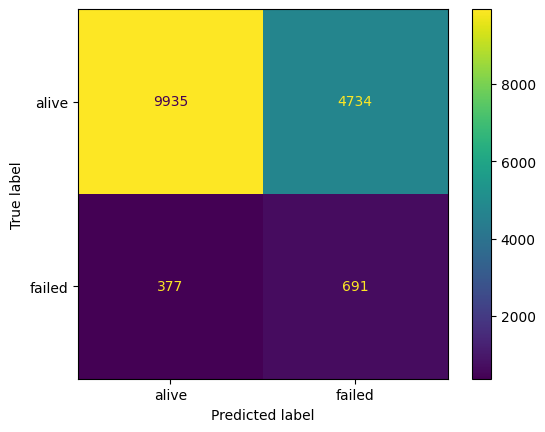

In [39]:
ConfusionMatrixDisplay.from_estimator(model_gb, X_test, y_test);

In [40]:
print(classification_report(y_test, model.predict(X_test)))

              precision    recall  f1-score   support

       alive       0.94      1.00      0.97     14669
      failed       0.80      0.13      0.23      1068

    accuracy                           0.94     15737
   macro avg       0.87      0.56      0.60     15737
weighted avg       0.93      0.94      0.92     15737

